In [3]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
# Define the device
dev = qml.device('default.mixed', wires=2)


In [4]:
x = np.array([np.pi])
Phi=2*np.arccos(np.sqrt((1-np.sin(x))/2))

In [5]:
@qml.qnode(dev,diff_method="backprop")
def circuit(x,p,params):
    qml.RY(x,wires=0)
    qml.U3(params[0],params[1],params[2],wires=0)
    qml.U3(params[3],params[4],params[5],wires=1)
    qml.CNOT(wires=[1,0])
    qml.RZ(params[6],wires=0)
    qml.RY(params[7],wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(params[8],wires=1)
    qml.CNOT(wires=[1,0])
    qml.U3(params[9],params[10],params[11],wires=0)
    qml.U3(params[12],params[13],params[14],wires=1)
    
    qml.DepolarizingChannel(1-p,wires=0)
    qml.DepolarizingChannel(1-p,wires=1)

   

    return qml.density_matrix(wires=[0,1])


In [6]:
@qml.qnode(dev,diff_method="backprop")
def circuit1(x,p,params):
    qml.RY(Phi,wires=0)
    qml.U3(params[0],params[1],params[2],wires=0)
    qml.U3(params[3],params[4],params[5],wires=1)
    qml.CNOT(wires=[1,0])
    qml.RZ(params[6],wires=0)
    qml.RY(params[7],wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(params[8],wires=1)
    qml.CNOT(wires=[1,0])
    qml.U3(params[9],params[10],params[11],wires=0)
    qml.U3(params[12],params[13],params[14],wires=1)
    
    qml.DepolarizingChannel(1-p,wires=0)
    qml.DepolarizingChannel(1-p,wires=1)

   

    return qml.density_matrix(wires=[0,1])

In [7]:
@qml.qnode(dev,diff_method="backprop")
def circuit2(p,params):
    # qml.RY(Phi,wires=0)
    qml.U3(params[0],params[1],params[2],wires=0)
    qml.U3(params[3],params[4],params[5],wires=1)
    qml.CNOT(wires=[1,0])
    qml.RZ(params[6],wires=0)
    qml.RY(params[7],wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(params[8],wires=1)
    qml.CNOT(wires=[1,0])
    qml.U3(params[9],params[10],params[11],wires=0)
    qml.U3(params[12],params[13],params[14],wires=1)
    
    qml.DepolarizingChannel(1-p,wires=0)
    qml.DepolarizingChannel(1-p,wires=1)

    

    return qml.density_matrix(wires=[0,1])

In [8]:
@qml.qnode(dev,diff_method="backprop")
def circuit3(p,params):
    qml.RY(np.pi,wires=0)
    qml.U3(params[0],params[1],params[2],wires=0)
    qml.U3(params[3],params[4],params[5],wires=1)
    qml.CNOT(wires=[1,0])
    qml.RZ(params[6],wires=0)
    qml.RY(params[7],wires=1)
    qml.CNOT(wires=[0,1])
    qml.RY(params[8],wires=1)
    qml.CNOT(wires=[1,0])
    qml.U3(params[9],params[10],params[11],wires=0)
    qml.U3(params[12],params[13],params[14],wires=1)
    
    qml.DepolarizingChannel(1-p,wires=0)
    qml.DepolarizingChannel(1-p,wires=1)

    

    return qml.density_matrix(wires=[0,1])




In [9]:
def cost(x, p, params):
    circuit_output = circuit(x,p,params)
    eig_values, eig_vectors = np.linalg.eigh(circuit_output)
    
    complex_jacobian_matrix = circuit1(x,p,params)-1/2*circuit2(p,params)-1/2*circuit3(p,params)
    
    L_theta = np.zeros_like(circuit_output)
    
    for n in range(len(eig_values)):
        for m in range(len(eig_values)):
            if not np.isclose(eig_values[n] + eig_values[m], 0):
                matrix_element = np.dot(np.conj(eig_vectors[:, m]).T,np.dot(complex_jacobian_matrix, eig_vectors[:, n]))
                L_theta =L_theta + (2 * matrix_element / (eig_values[n] + eig_values[m])) * np.outer(eig_vectors[:, m], np.conj(eig_vectors[:, n]))
    
    L_theta_squared = np.dot(L_theta, L_theta)
    QFI = np.trace(np.dot(L_theta_squared, circuit_output))
    
    return -np.real(QFI)


[0.07085898012105528, 0.04320112450159881, 0.02329476319935258, 0.01001792958694238, 0.002453919872359594, 1.7577626993461116e-09, 0.0024455286330458473, 0.010000440243769062, 0.023266856634324276, 0.04316103465435681, 0.07080469134692728, 0.10740944987178705, 0.15417526651703956, 0.21221572890464946, 0.2825139660236761, 0.365905723895235, 0.46308231157714225, 0.5746053725199335, 0.7009266991672524, 0.8424083989262159, 0.9993407777800329]


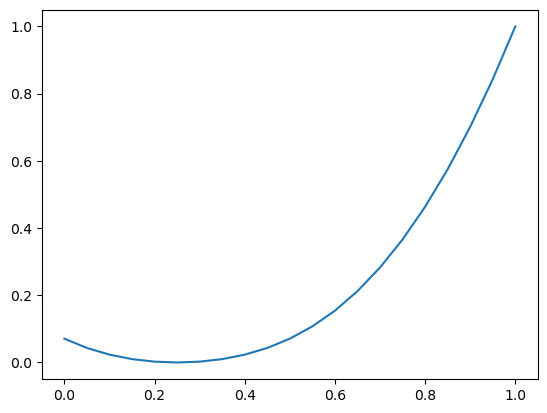

In [10]:
params=np.random.uniform(-np.pi,np.pi,15)
p_val = np.linspace(0.00001, 0.99980, num=21)
f=[]
for p in p_val:
    p=-cost(x, p,params)
    f.append(p)
plt.plot(p_val,f)
print(f)

In [19]:
opt = qml.SPSAOptimizer(maxiter=1)

p_values = np.linspace(0.00001, 0.99980, num=21)
QFI_values = []

for p in p_values:
    maxQFI = 0  
    seed_val = 10

    # Optimization loop for different seeds
    for seed in range(seed_val):
        np.random.seed(seed)
        params = np.random.uniform(-np.pi,np.pi,15)  
        costs = []

        for i in range(10):
            params, current_cost = opt.step_and_cost(lambda params: cost(x, p, params), params)
            costs.append(current_cost)

            if (i + 1) % 10 == 0:
                print(f"Step {i + 1}: Cost = {current_cost}")

        QFI_value = -costs[-1]  
        if QFI_value>maxQFI:
            maxQFI = QFI_value  

    QFI_values.append(maxQFI) 

print(QFI_values)
plt.plot(p_values, QFI_values, '-o')
plt.xlabel('p')
plt.ylabel('QFI Value')
plt.title('QFI Value vs. p')
plt.grid(True)
plt.show()

Step 10: Cost = -0.07963204039337635
Step 10: Cost = -0.0844496509147637


KeyboardInterrupt: 